In [2]:
from sklearn import datasets

from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
wine_df = datasets.load_wine()

X = wine_df.data
y = wine_df.target

In [4]:
n_clusters = 3
random_state = 0

model = KMeans(n_clusters=n_clusters, random_state=random_state)

In [5]:
model.fit(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [6]:
predictions = model.predict(X)
print(predictions)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [7]:
cluster_0 = X[predictions == 0]
cluster_1 = X[predictions == 1]
cluster_2 = X[predictions == 2]
# cluster_3 = X_pca[predictions == 3]

Text(0.5, 1.0, 'KMeans')

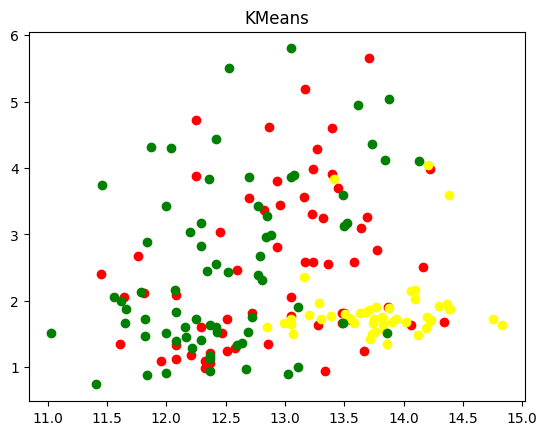

In [8]:
plt.scatter(cluster_0[:,0], cluster_0[:,1],  color = 'red')
plt.scatter(cluster_1[:,0], cluster_1[:,1], color = 'yellow')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color = 'green')
# plt.scatter(cluster_3[:,0], cluster_3[:,1], color = 'black')
plt.title('KMeans')

In [9]:
n_components = 2
pca = PCA(n_components=n_clusters).fit(X)
X_pca = pca.transform(X)

Text(0.5, 1.0, 'KMeans PCA')

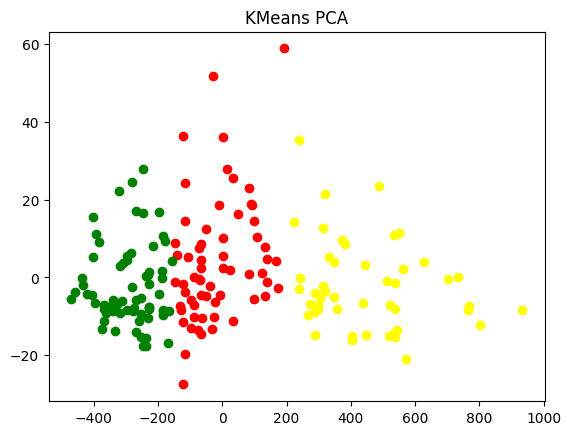

In [10]:
cluster_0 = X_pca[predictions == 0]
cluster_1 = X_pca[predictions == 1]
cluster_2 = X_pca[predictions == 2]

plt.scatter(cluster_0[:,0], cluster_0[:,1],  color = 'red')
plt.scatter(cluster_1[:,0], cluster_1[:,1], color = 'yellow')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color = 'green')
# plt.scatter(cluster_3[:,0], cluster_3[:,1], color = 'black')
plt.title('KMeans PCA')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [13]:
eps = 0.5
min_samples = 3

cluster_assignments = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_pca)
print(cluster_assignments)


[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0  3  1  1  2  0  3  0  0  3  5  0  1  0
 -1  0  0  3  3  1  0  2 -1  0  3  4  0  3  3  3  1  3  1  1  1  3  3  0
  5  3  0  3  3  3  2  3  3  1  3  1  3  0  0  3  1  3  3 -1  3  3 -1  3
  0  0  1  5  0  3  2  1  3  1 -1  4  4  4  4  4 -1  4  4  4  4  4  4  4
 -1  4  4  4  4  4  4  4 -1  4  4 -1  4  4 -1 -1  4 -1  4  4  4  4  4  4
  4  4 -1  4  4 -1  4  4  4 -1]


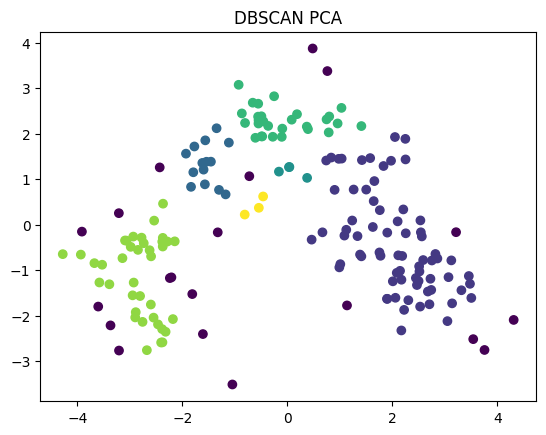

In [14]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_assignments)
plt.title("DBSCAN PCA")
plt.show()

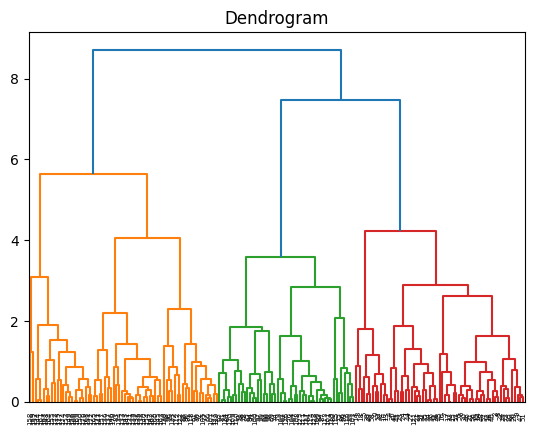

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergins = linkage(X_pca, method='complete')

dendrogram(mergins, leaf_rotation=90)

plt.title("Dendrogram")
plt.show()